<a href="https://colab.research.google.com/github/kary99/MachineLearningPracticals/blob/main/G6_Stock_Prediction_Practical_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from datetime import date
import numpy as np
import pandas as pd
import yfinance as yf
from prophet import Prophet
from prophet.plot import plot_plotly
from plotly import graph_objs as go
from plotly.offline import iplot, plot

In [ ]:
START = "2015-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

In [ ]:
def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

**Stock Names: "AAPL", "GOOG", "MSFT", "GME", "TRIDENT.NS", "TATAPOWER.NS", "PERSISTENT.NS"**

In [ ]:
data = load_data(input())
print("Loading data...done!")
print("Raw Data")
data.tail()

GOOG
[*********************100%***********************]  1 of 1 completed
Loading data...done!
Raw Data


,Date,Open,High,Low,Close,Adj Close,Volume
1981,2022-11-14,95.500000,97.180000,95.112999,96.029999,96.029999,24170100
1982,2022-11-15,98.669998,100.419998,97.019997,98.720001,98.720001,31831000
1983,2022-11-16,98.019997,99.849998,97.902000,98.989998,98.989998,24660200
1984,2022-11-17,97.180000,99.480003,97.099998,98.500000,98.500000,21818700
1985,2022-11-18,99.010002,99.160004,96.739998,97.800003,97.800003,24959300


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1986 non-null   datetime64[ns]
 1   Open       1986 non-null   float64       
 2   High       1986 non-null   float64       
 3   Low        1986 non-null   float64       
 4   Close      1986 non-null   float64       
 5   Adj Close  1986 non-null   float64       
 6   Volume     1986 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 108.7 KB


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1.986000e+03
mean,67.510612,68.214684,66.830907,67.534374,67.534374,3.294707e+07
std,34.382682,34.782815,33.982262,34.373230,34.373230,1.582153e+07
min,24.664783,24.730902,24.311253,24.560070,24.560070,6.936000e+06
25%,39.778124,40.060251,39.563376,39.772564,39.772564,2.349900e+07
50%,56.557501,57.196751,55.895802,56.622999,56.622999,2.911700e+07
75%,87.455378,88.462999,86.745752,87.336123,87.336123,3.771300e+07
max,151.863495,152.100006,149.887497,150.709000,150.709000,2.232980e+08


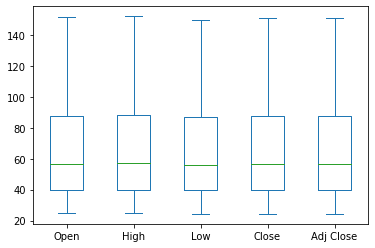

In [ ]:
# to visuallay represent outliers
data[['Open', 'High', 'Low', 'Close', 'Adj Close']].plot(kind='box')

In [ ]:
fig = go.Figure( go.Scatter(x=data['Date'], y=data['Close'] ) )
fig.show()

In [ ]:
#Building the regression model

from sklearn.model_selection import train_test_split

#for preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [ ]:
X = np.array(data.index).reshape(-1,1)
Y = data['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=101)

In [ ]:
scaler = StandardScaler().fit(X_train)

Using Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [ ]:
import plotly.express as px

fig = px.scatter(data, x=X_train.T[0], y=Y_train)
fig.add_traces(go.Scatter(x=X_train.T[0], y=lm.predict(X_train), name='Predicted', mode='lines'))
fig.show()

In [ ]:
r2_train = r2_score(Y_train, lm.predict(X_train))
r2_test = r2_score(Y_test, lm.predict(X_test))

mse_train = mse(Y_train, lm.predict(X_train))
mse_test = mse(Y_test, lm.predict(X_test))

print('Training Error:')
r2_train, mse_train

Training Error:


(0.8170985403056701, 220.04562979913868)

In [ ]:
print('Testing Error:')
r2_test, mse_test

Testing Error:


(0.8069227306971493, 217.73172496956917)

**Using KNN**

In [ ]:
from sklearn import neighbors
from math import sqrt

In [ ]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, Y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mse(Y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1.4345697002355073
RMSE value for k=  2 is: 1.2357964188984907
RMSE value for k=  3 is: 1.2632606614631188
RMSE value for k=  4 is: 1.293445165874305
RMSE value for k=  5 is: 1.321524759610496
RMSE value for k=  6 is: 1.405398734888745
RMSE value for k=  7 is: 1.4527178501457505
RMSE value for k=  8 is: 1.5318784359847442
RMSE value for k=  9 is: 1.5891125543307376
RMSE value for k=  10 is: 1.6215062098819915
RMSE value for k=  11 is: 1.6729041111905703
RMSE value for k=  12 is: 1.7159976388714222
RMSE value for k=  13 is: 1.744936898849565
RMSE value for k=  14 is: 1.778381527919334
RMSE value for k=  15 is: 1.8251575512695983
RMSE value for k=  16 is: 1.8550792077578755
RMSE value for k=  17 is: 1.899807330780561
RMSE value for k=  18 is: 1.936590374608009
RMSE value for k=  19 is: 1.9702397211016882
RMSE value for k=  20 is: 2.0248670359208534


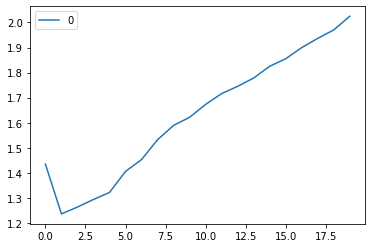

In [ ]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

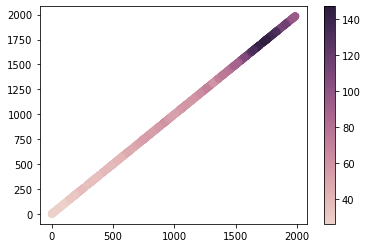

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
     X_test, X_test, c=model.predict(X_test), s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

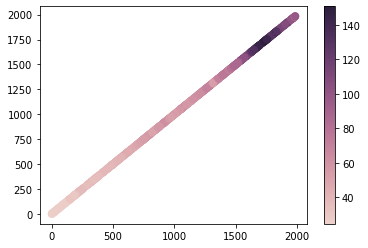

In [ ]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
     X_test, X_test, c=(Y_test), s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(neighbors.KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [ ]:
gridsearch.best_params_

{'n_neighbors': 2}

Performance evaluation of model

In [ ]:
train_preds_grid = gridsearch.predict(X_train)
train_mse = mse(Y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
test_preds_grid = gridsearch.predict(X_test)
test_mse = mse(Y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
train_rmse

0.740213071777426

**Forecasting Using Facebook Prophet**

In [ ]:
df_train = data[["Date", "Close"]]
df_train = df_train.rename(columns={"Date": "ds", "Close":"y"})

In [ ]:
m = Prophet()
m.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpstg2aze0/ssxt_rwo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpstg2aze0/zjivwhio.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62360', 'data', 'file=/tmp/tmpstg2aze0/ssxt_rwo.json', 'init=/tmp/tmpstg2aze0/zjivwhio.json', 'output', 'file=/tmp/tmpstg2aze0/prophet_modelh4cl0h8o/prophet_model-20221121185028.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:50:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:50:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=int(input("How many years to predict: "))*365)
forecast = m.predict(future)

How many years to predict: 1


In [ ]:
print("Forecast Data")
forecast.tail()

Forecast Data


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2346,2023-11-14,99.982635,81.479379,123.685311,81.971247,120.308697,1.448989,1.448989,1.448989,0.039291,0.039291,0.039291,1.409698,1.409698,1.409698,0.0,0.0,0.0,101.431624
2347,2023-11-15,99.946063,81.387491,122.678171,81.898381,120.328480,1.724373,1.724373,1.724373,0.142256,0.142256,0.142256,1.582117,1.582117,1.582117,0.0,0.0,0.0,101.670436
2348,2023-11-16,99.909492,82.219527,122.695102,81.825515,120.348678,1.870383,1.870383,1.870383,0.113020,0.113020,0.113020,1.757363,1.757363,1.757363,0.0,0.0,0.0,101.779875
2349,2023-11-17,99.872920,82.149232,122.989649,81.718575,120.480150,2.005805,2.005805,2.005805,0.072369,0.072369,0.072369,1.933436,1.933436,1.933436,0.0,0.0,0.0,101.878725
2350,2023-11-18,99.836349,81.193605,124.828603,81.572546,120.611623,1.892543,1.892543,1.892543,-0.215752,-0.215752,-0.215752,2.108296,2.108296,2.108296,0.0,0.0,0.0,101.728892


In [ ]:
fig1 = plot_plotly(m, forecast)
fig1

Forecast Components


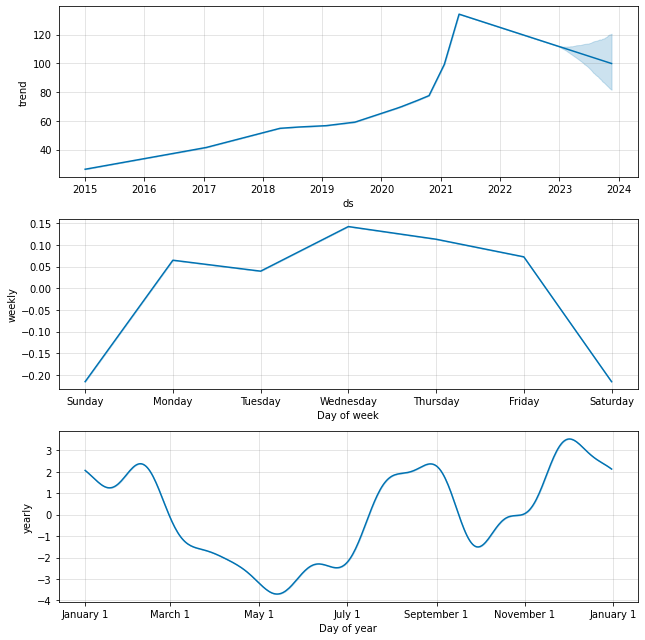

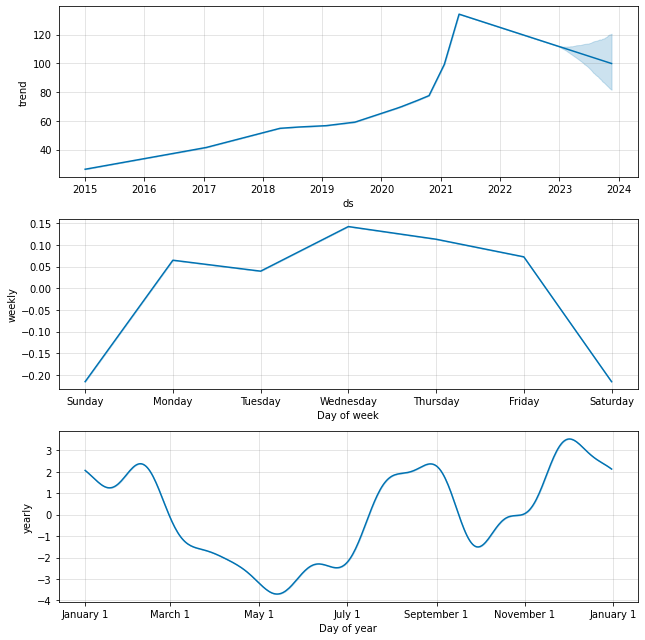

In [ ]:
print("Forecast Components")
fig2 = m.plot_components(forecast)
fig2